# Regression Models

In these exercises we will learn how to use regression models in the scikit-learn library. Unlike classification, which predicts discrete classes, regression predicts continuous numerical values. We will use synthetic datasets to visualize the behavior of these models and gain a better understanding of how they work.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

#Setting random seed for reproducibility
random_state = 42
np.random.seed(random_state)

print("Required libraries loaded successfully!")

Required libraries loaded successfully!


## 1. Generating synthetic datasets for regression

We will create two simple synthetic datasets where the target variable (`y`) is continuous:
1. **Linearly dependent data:** Data that can be well approximated by a linear model (e.g., `y = ax + b + noise`).
2. **Nonlinearly dependent data:** Data with a more complex, nonlinear dependence (e.g., `y = sin(x) + noise`).

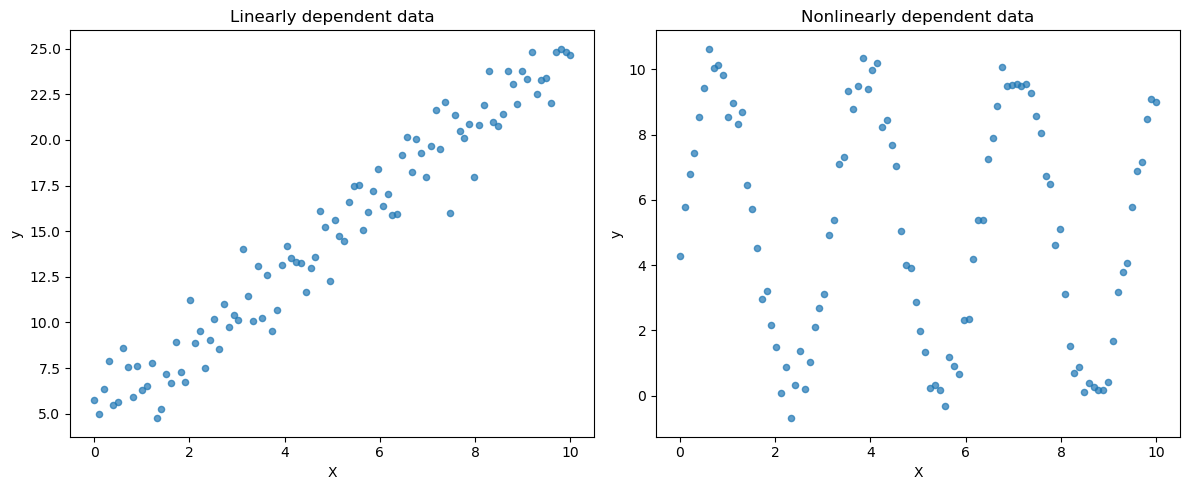

In [2]:
# Linearly dependent data
X_lin = np.linspace(0, 10, 100).reshape(-1, 1) # Single feature (1D)
y_lin = 2 * X_lin + 5 + np.random.normal(0, 1.5, X_lin.shape) # Linear relation + noise

# Nonlinearly dependent data (sinusoidal function)
X_nonlin = np.linspace(0, 10, 100).reshape(-1, 1)
y_nonlin = np.sin(X_nonlin * 2) * 5 + np.random.normal(0, 0.5, X_nonlin.shape) + 5 # Sinusoidal relation + noise

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_lin, y_lin, s=20, alpha=0.7)
plt.title('Linearly dependent data')
plt.xlabel('X')
plt.ylabel('y')

plt.subplot(1, 2, 2)
plt.scatter(X_nonlin, y_nonlin, s=20, alpha=0.7)
plt.title('Nonlinearly dependent data')
plt.xlabel('X')
plt.ylabel('y')

plt.tight_layout()
plt.show()

## 2. Helper function for visualizing and evaluating regression models

We will define a function that will help us train the model, predict values, compute metrics, and visualize the regression line. Similar to the `train_model` function from classification, but adapted for regression.

In [5]:
def plot_regression_results(model, X, y, title, ax):
    """
    Displays regression model results, predictions, and metrics.
    """
    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

    # Train the model
    model.fit(X_train, y_train)

    # Predictions on the test set
    y_pred = model.predict(X_test)

    # Predictions across the whole input range for visualization
    # Create a smooth prediction line over the entire range of X values
    X_plot = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
    y_plot_pred = model.predict(X_plot)

    # Evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Display results
    ax.scatter(X, y, s=20, alpha=0.7, label='Actual data', color='blue')
    ax.plot(X_plot, y_plot_pred, color='red', linewidth=2, label='Model prediction')
    ax.set_title(f'{title}\nMSE: {mse:.2f}, R^2: {r2:.2f}')
    ax.set_xlabel('X')
    ax.set_ylabel('y')
    ax.legend()
    ax.grid(True)


**Evaluation metrics for regression:**
- **Mean Squared Error (MSE):** Mean squared error. Measures the average squared difference between predicted and actual values. Lower values are better.
- **R-squared (R^2):** Coefficient of determination. Measures how well the model explains the variability of the target variable. Values typically range from 0 to 1 (or can be less than 0 for very poor models), where 1 means the model perfectly explains the variance.

## 3. Linear Regression

Linear regression is a simple yet powerful algorithm for modeling linear relationships between input features and a numerical target variable. It aims to find the best straight line that fits the data.

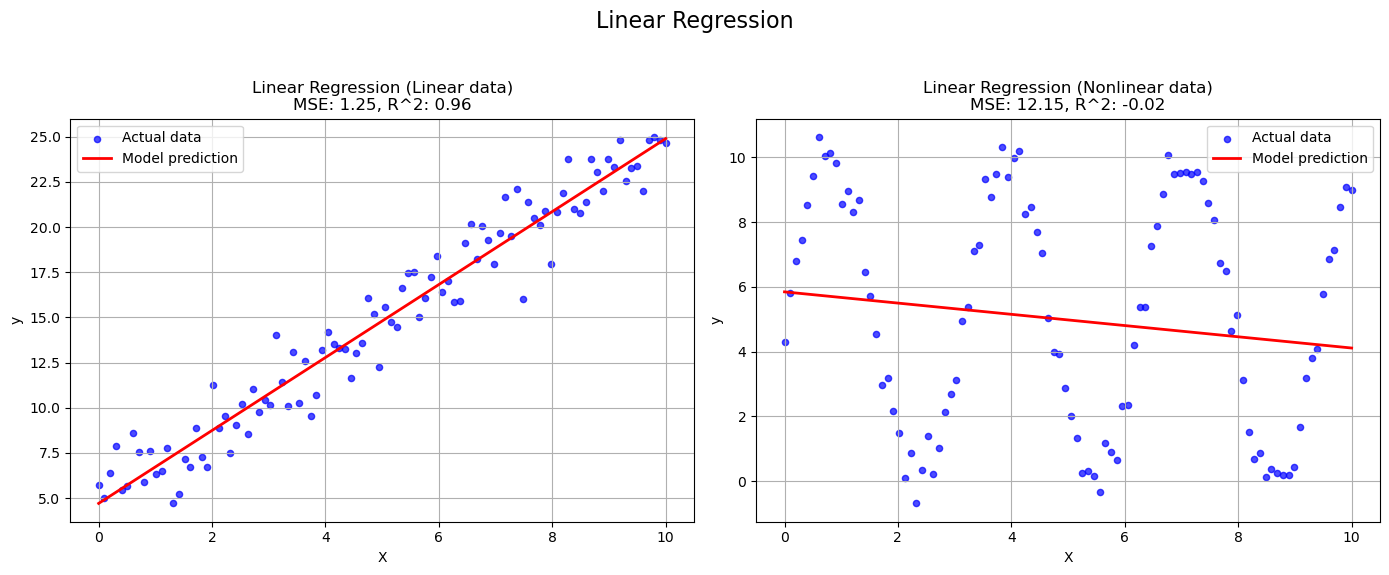

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Linear Regression', fontsize=16)

# On linearly dependent data
model_lin_lin = LinearRegression()
plot_regression_results(model_lin_lin, X_lin, y_lin, 'Linear Regression (Linear data)', axes[0])
# On nonlinearly dependent data
model_lin_nonlin = LinearRegression()
plot_regression_results(model_lin_nonlin, X_nonlin, y_nonlin, 'Linear Regression (Nonlinear data)', axes[1])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Analysis:**
- On linearly dependent data, Linear Regression performs very well, providing a high R^2 value and a low MSE.
- On nonlinearly dependent data, Linear Regression fails to capture the complexity of the relationship, resulting in poorer performance and a visible deviation of the model from the actual data, because it attempts to approximate a nonlinear relationship with a straight line.

## 4. Decision Tree for Regression (Decision Tree Regressor)

A decision tree can be used for regression problems. The model learns a series of simple rules (if–then–else) from features to predict a numerical target value. It is not limited to linear relationships and can model complex nonlinear boundaries by splitting the input space into regions and predicting the average value of the target variable within each partition.

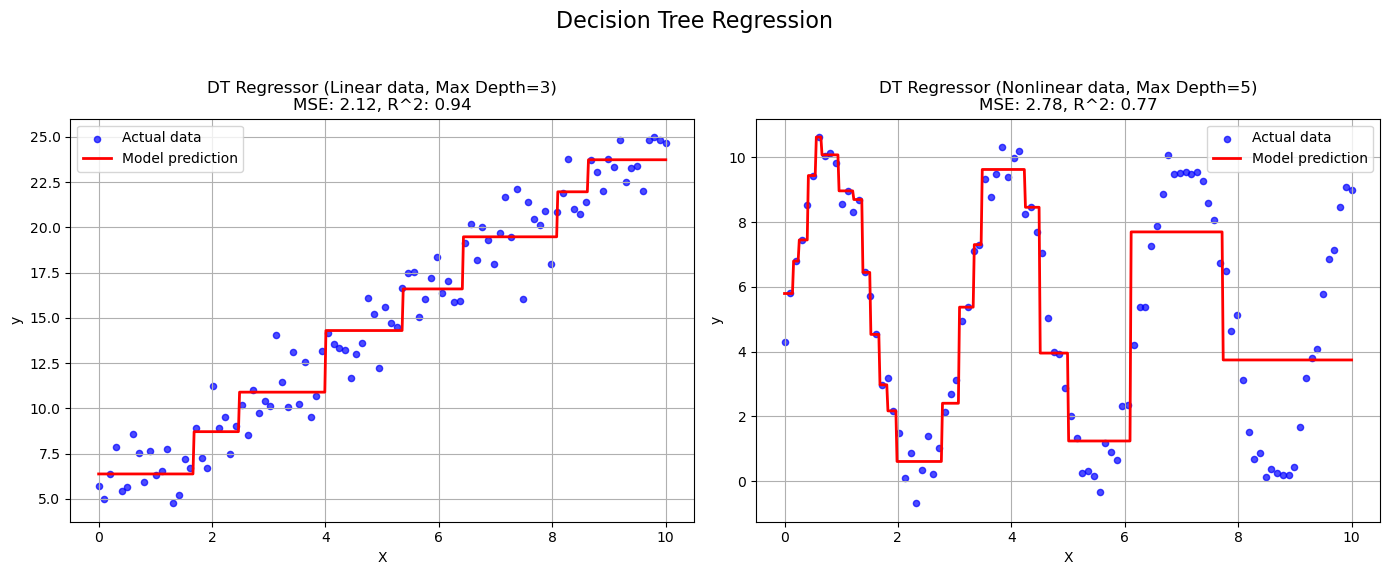

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Decision Tree Regression', fontsize=16)

# On linearly dependent data (small depth)
model_dt_lin = DecisionTreeRegressor(max_depth=3, random_state=random_state)
plot_regression_results(model_dt_lin, X_lin, y_lin, 'DT Regressor (Linear data, Max Depth=3)', axes[0])
# On nonlinearly dependent data (larger depth)
model_dt_nonlin = DecisionTreeRegressor(max_depth=5, random_state=random_state)
plot_regression_results(model_dt_nonlin, X_nonlin, y_nonlin, 'DT Regressor (Nonlinear data, Max Depth=5)', axes[1])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Analysis:**
- A decision tree can approximate nonlinear functions, but it predicts "stepwise" values because it predicts a constant value within each region.
- The `max_depth` parameter is crucial: too shallow a depth can lead to underfitting, while too great a depth can lead to overfitting (the model learns overly specific details of the training data and becomes sensitive to noise).

## 5. Random Forests for Regression (Random Forest Regressor)

Random forests are an ensemble method that combines multiple decision trees. Each tree is trained on a subsample of the data and features, and the final prediction is the **average** of all trees' predictions. This helps reduce overfitting and improves generalization, making the model more robust.

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


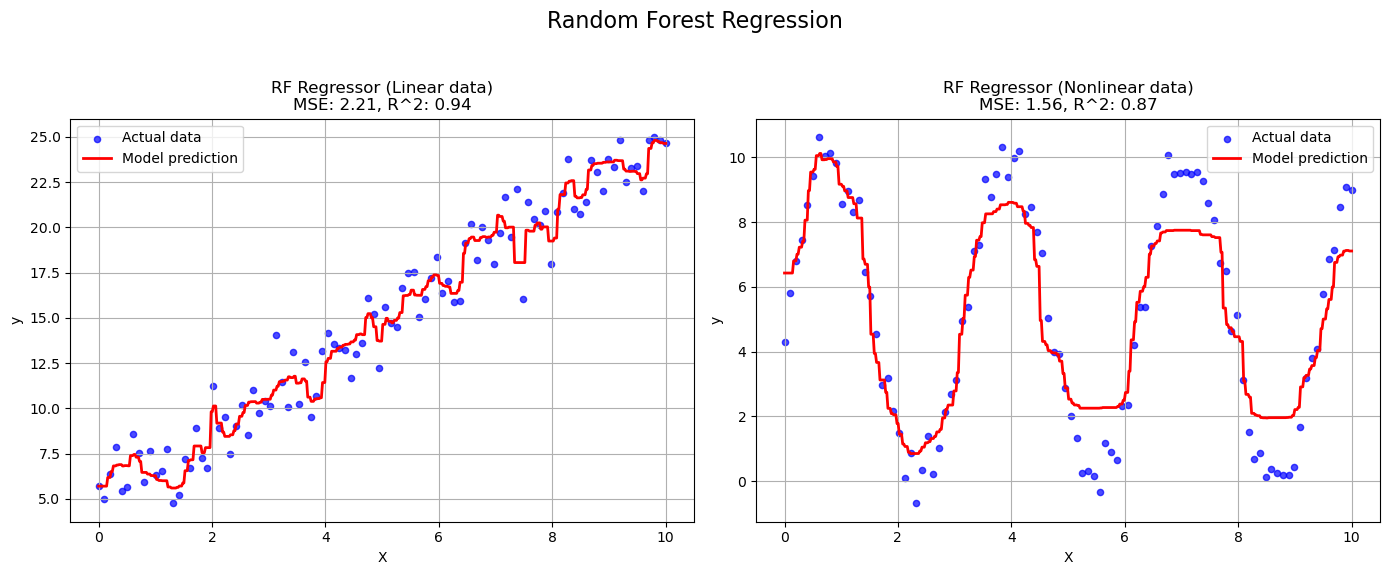

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Random Forest Regression', fontsize=16)

# On linearly dependent data
model_rf_lin = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=random_state)
plot_regression_results(model_rf_lin, X_lin, y_lin, 'RF Regressor (Linear data)', axes[0])
# On nonlinearly dependent data
model_rf_nonlin = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=random_state)
plot_regression_results(model_rf_nonlin, X_nonlin, y_nonlin, 'RF Regressor (Nonlinear data)', axes[1])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Analysis:**
- Random Forest typically outperforms individual decision trees due to reduced variance and its ability to smooth the "stepwise" outputs of single trees.
- It performs well on both linear and nonlinear data and is able to capture complex relationships.
- Parameters such as `n_estimators` (number of trees) and `max_depth` (maximum tree depth) are key for tuning performance. More trees usually improve the model's robustness.

## 6. Comparing performance with different numbers of trees (Random Forest)

Increasing the number of trees (`n_estimators`) usually improves performance up to a certain point, but also increases training and inference time. However, it rarely leads to overfitting in a Random Forest.

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


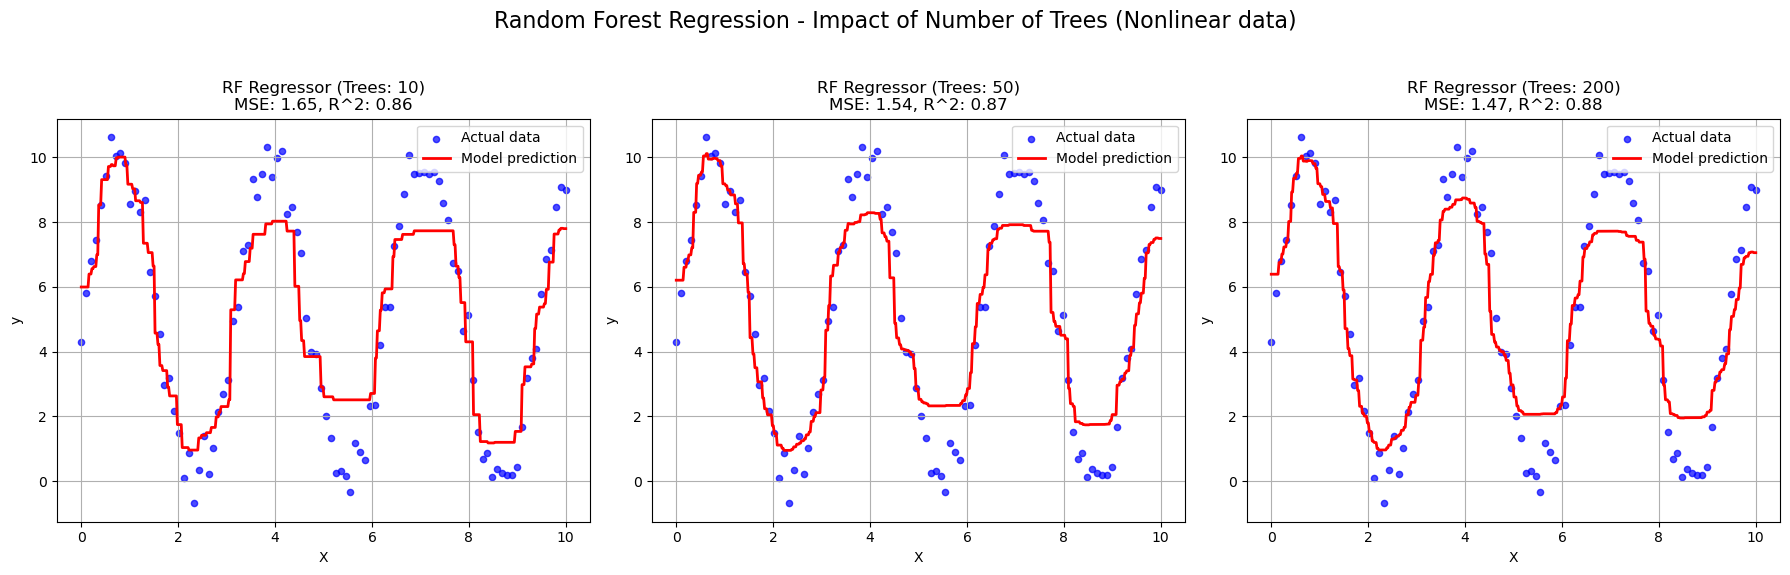

In [9]:
num_trees_options = [10, 50, 200]

fig, axes = plt.subplots(1, len(num_trees_options), figsize=(18, 6))
fig.suptitle('Random Forest Regression - Impact of Number of Trees (Nonlinear data)', fontsize=16)

for i, n_estimators in enumerate(num_trees_options):
    model = RandomForestRegressor(n_estimators=n_estimators, max_depth=5, random_state=random_state)
    plot_regression_results(model, X_nonlin, y_nonlin, f'RF Regressor (Trees: {n_estimators})', axes[i])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Conclusion:**
The choice of regression model depends on the nature of the data and the complexity of the relationships we are trying to model. Linear models are fast and interpretable but limited to linear relationships. Tree-based models, such as Decision Tree and Random Forest, are more flexible and can capture nonlinear relationships, with Random Forest typically providing better generalization performance and robustness.